In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

In [2]:
# Importing dataset through Pandas
df = pd.read_csv("../datasets/Clients.csv")
df.head()

,age,job,marital,education,default,balance,housing,personal,term
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,35,management,married,tertiary,no,231,yes,no,no
4,28,management,single,tertiary,no,447,yes,yes,no


In [3]:
# Shape of the dataset
print(df.shape)

(43193, 9)


In [4]:
# info of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43193 entries, 0 to 43192
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43193 non-null  int64 
 1   job        43193 non-null  object
 2   marital    43193 non-null  object
 3   education  43193 non-null  object
 4   default    43193 non-null  object
 5   balance    43193 non-null  int64 
 6   housing    43193 non-null  object
 7   personal   43193 non-null  object
 8   term       43193 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.0+ MB
None


In [5]:
# Description of dataset
print(df.describe())

                age        balance
count  43193.000000   43193.000000
mean      40.764082    1354.027342
std       10.512640    3042.103625
min       18.000000   -8019.000000
25%       33.000000      71.000000
50%       39.000000     442.000000
75%       48.000000    1412.000000
max       95.000000  102127.000000


In [6]:
# Converting Categorical features into Numerical features

for column in df.columns:
    if df[column].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[column].values)) 
        df[column] = lbl.transform(list(df[column].values))

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,personal,term
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,33,2,1,1,0,2,1,1,0
3,35,4,1,2,0,231,1,0,0
4,28,4,2,2,0,447,1,1,0


In [8]:
# Plotting Correlation Heatmap
corrs = df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='client-corrheatmap.html')

'client-corrheatmap.html'

In [13]:
# Description of dataset
df.describe()

,age,job,marital,education,default,balance,housing,personal,term
count,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000
mean,40.764082,4.298775,1.166485,1.149608,0.018105,1354.027342,0.562406,0.164541,0.116246
std,10.512640,3.238402,0.609584,0.664907,0.133332,3042.103625,0.496096,0.370770,0.320523
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,71.000000,0.000000,0.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,442.000000,1.000000,0.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1412.000000,1.000000,0.000000,0.000000
max,95.000000,10.000000,2.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,1.000000


In [14]:
# Dividing data into subsets
# subset = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'personal', 'term']]
subset = df[['age', 'job', 'default', 'housing', 'personal', 'term']]

# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X = feature_scaler.fit_transform(subset)

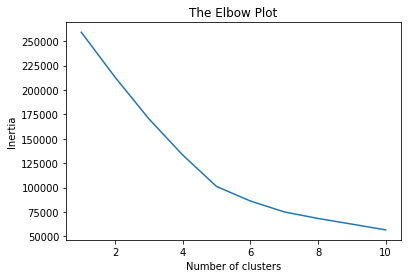

In [15]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [17]:
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity =50,n_iter=2000)
x_tsne = tsne.fit_transform(X)

# tsne = PCA(n_components = 2)
# tsne.fit(X)
# x_tsne = tsne.transform(X)

age = list(df['age'])
job = list(df['job'])
marital = list(df['marital'])
education = list(df['education'])
default = list(df['default'])
housing = list(df['housing'])
personal = list(df['personal'])
term = list(df['term'])


data = [go.Scatter(x=x_tsne[:,0],
                   y=x_tsne[:,1], 
                   mode='markers',
                   marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                   text=[f'age: {a}, job: {b}, default: {e}, housing: {f}, personal: {g}, term: {h}' 
                         for a,b,e,f,g,h in list(zip(age,
                                                     job,
#                                                      marital,
#                                                      education,
                                                     default,
                                                     housing,
                                                     personal,
                                                     term
                                                    ))],
                                hoverinfo='text')]
layout = go.Layout(title = 't-SNE Dimensionality Reduction for Clients', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='client-t-SNE.html')

'client-t-SNE.html'